### Sobre os dados

Este conjunto de dados é sobre a evasão de clientes de uma empresa de telefonia. Abaixo temos o dicionário de dados.

**state** - Código de 2 letras do estado americado de residencia do cliente

**account length** - numero de meses que o cliente está com o provedor de telecomunicações

area code - codigo de área

**international plan** - Se cliente possui plano internacional sim ou não

**voice mail plan** - Se o cliente tem plano de correio de voz sim ou não

**number vmail messages** - Numero de mensagem de correio de voz

total day minutes - total de minutos das chamadas diarias

total day calls - numeros total de chamadas diarias

total day charge - cobrança total das chamadas por dia

total eve minutes - total de minutos de chamadas noturnas

total eve calls - total de chamadas noturnas

total eve charge - cobrança total das chamadas noturna

total night minutes - total de minutos de chamadas noturnas

total night calls - Numero total de chamadas noturnas

total night charge - cobrança total das chamadas noturnas

total intl minutes - total de minutos para chamadas 
internacionais

total intl calls - total de chamadas internacionais

total intl charge - cobrança total de chamadas internacionais

number customer service calls - numero de ligações para atendimento ao cliente

Churn - Evasão de clientes, sim ou não


<center>
<li> Alex Vinicius Souza do Nascimento	920110872
<li> Alexsandro dos Santos Silva	319200068
<li> Evelyn Castro Maia e Souza	3019200390
<li> Filipe Queiroz de Abreu	919210778	
<li> Kaike Soares Silva	919209611	
<li>Nailda Rodrigues Gonçalves	919203559	
</center>
<hr style='
    padding: 0;
    border: none;
    border-top: medium double #333;
    color: #333;
    text-align: center;'>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('data\churn_train.csv')
df.shape

(4250, 20)

#### Análise Exploratória

In [3]:
df.shape

(4250, 20)

<AxesSubplot:ylabel='churn'>

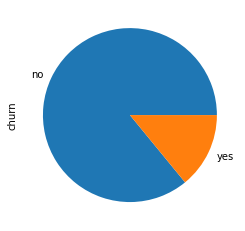

In [4]:
df.churn.value_counts().plot(kind='pie')

<AxesSubplot:ylabel='international_plan'>

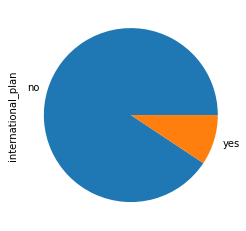

In [5]:
df.international_plan.value_counts().plot(kind='pie')

In [6]:
churn_y = df.loc[df.churn == 'yes', 'churn'].count()
churn_n = df.loc[df.churn == 'no', 'churn'].count()
churn_total = churn_y+churn_n
print('Quantidade total de clientes ' +str(churn_total))
print('Quantidade de clientes com churn ' +str(churn_y) + ' que representa ' + str(round(100*churn_y/churn_total,0)) + '% da base de clientes')
print('Quantidade de clientes sem churn ' +str(churn_n) + ' que representa ' + str(round(100*churn_n/churn_total,0)) + '% da base de clientes')

Quantidade total de clientes 4250
Quantidade de clientes com churn 598 que representa 14.0% da base de clientes
Quantidade de clientes sem churn 3652 que representa 86.0% da base de clientes


In [7]:
# !pip freeze > requirements.txt

In [8]:
df.isnull().sum() 

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

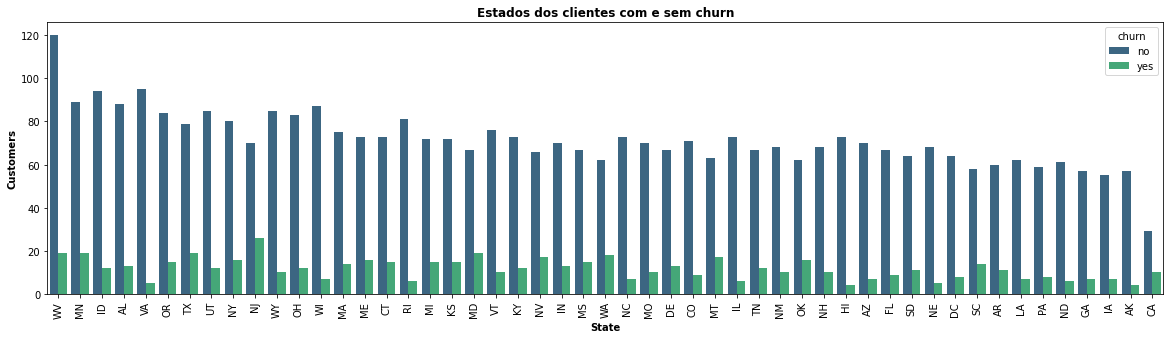

In [9]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(data = df, x='state', order=df['state'].value_counts().index, palette='viridis', hue='churn')
plt.xticks(rotation=90)
plt.xlabel('State', fontsize=10, fontweight='bold')
plt.ylabel('Customers', fontsize=10, fontweight='bold')
plt.title('Estados dos clientes com e sem churn', fontsize=12, fontweight='bold')
plt.show()

<AxesSubplot:>

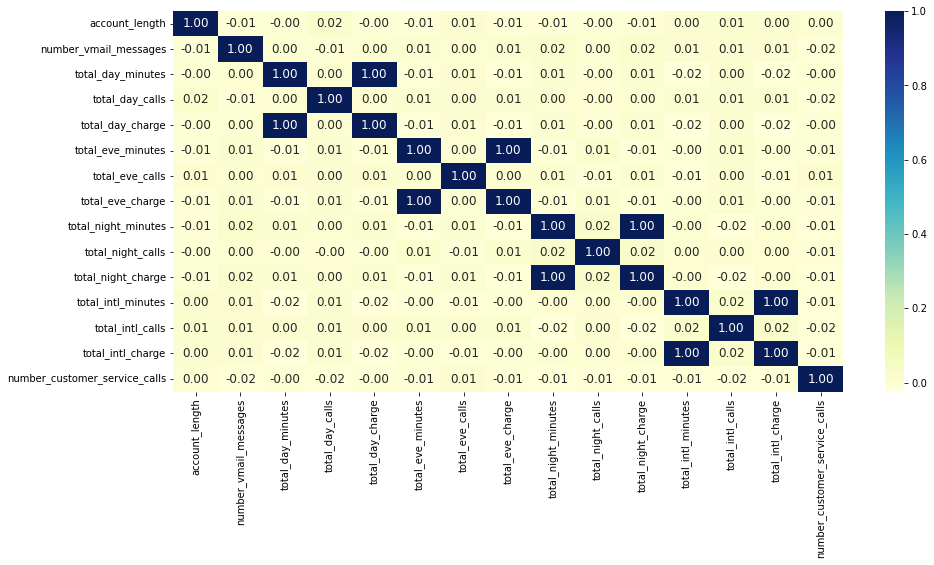

In [10]:
# Correlação entre as variáveis 
corr = df.corr()
fig2, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, cmap='YlGnBu', annot_kws={'size': 12}, fmt='.2f')

#### Feature Engineering

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [12]:
df['churn'] = df['churn'].astype('category')
df['churn'] = df['churn'].cat.codes

In [13]:
df['voice_mail_plan'] = df['voice_mail_plan'].astype('category') 
df['voice_mail_plan'] = df['voice_mail_plan'].cat.codes

In [14]:
df['international_plan'] = df['international_plan'].astype('category')
df['international_plan'] = df['international_plan'].cat.codes

In [15]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,WV,73,area_code_408,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,NC,75,area_code_408,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,HI,50,area_code_408,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


In [16]:
df = pd.get_dummies(df, columns=['area_code'])

In [17]:
df['state'] = df['state'].astype('category')
df['state'] = df['state'].cat.codes

#### Treinamento do modelo

In [18]:
#pip install xgboost

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import seaborn as sns 
import warnings

In [20]:
#Criando uma coluna contraria de churn, a not_churn

switch= {
    1:0,
    0:1
}

df['not_churn'] = df['churn'].map(switch)

In [21]:
df[['churn','not_churn']].tail(5)

,churn,not_churn
4245,0,1
4246,0,1
4247,0,1
4248,0,1
4249,0,1


In [22]:
df['churn'].value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [23]:
df['not_churn'].value_counts()

1    3652
0     598
Name: not_churn, dtype: int64

In [24]:
# Separando variáveis independentes e dependente
X = df.drop(['churn','total_day_charge', 'total_eve_charge', 
             'total_night_charge','total_intl_charge', 'area_code_area_code_510',
             'area_code_area_code_415','voice_mail_plan'],axis=1)
y = df['churn']

In [25]:
pd.DataFrame(list(X.columns))

,0
0,state
1,account_length
2,international_plan
3,number_vmail_messages
4,total_day_minutes
5,total_day_calls
6,total_eve_minutes
7,total_eve_calls
8,total_night_minutes
9,total_night_calls


<AxesSubplot:>

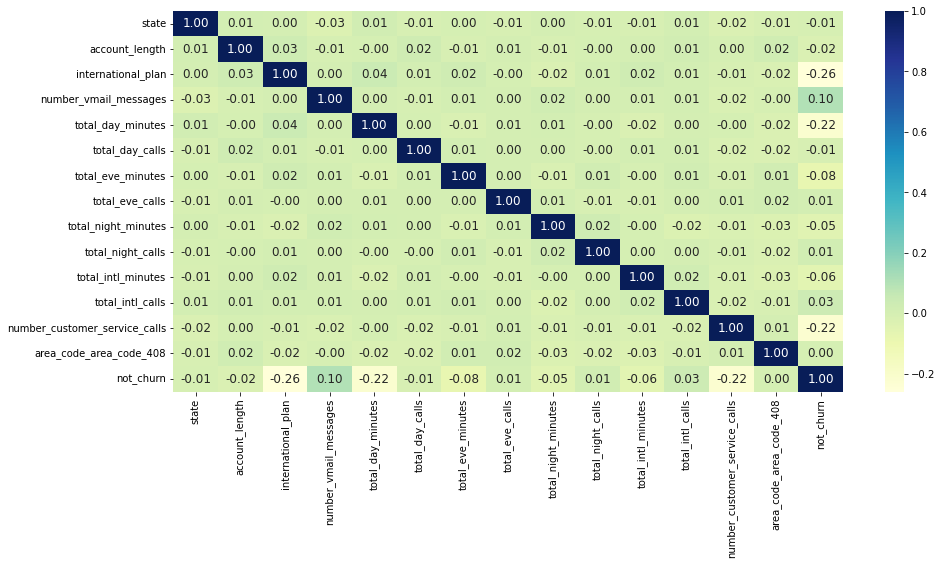

In [26]:
# Correlação entre as variáveis, com as variaves redundantes removidas
corr = X.corr()
fig2, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, cmap='YlGnBu', annot_kws={'size': 12}, fmt='.2f')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=987,
                                                   stratify = y) 
#utilizado stratify para uma separção proporcinal dos churns e nao churns

In [28]:
xgb_model = XGBClassifier(max_depth=20, 
                          learning_rate=0.1,
                          n_estimators=200, 
                          silent=True,
                          objective='binary:logistic',
                          nthread=-1,
                          missing=np.nan,
                          subsample=0.9, 
                          colsample_bytree=0.9, 
                          base_score=0.5, 
                          scaling_type = 'Logaritmic',
                          seed=142)

In [29]:
xgb_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scaling_type", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, nthread=-1, num_parallel_tree=1,
              random_state=142, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              scaling_type='Logaritmic', seed=142, silent=True, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
prob = xgb_model.predict_proba(X_test)[:,1]
pred = xgb_model.predict(X_test)

In [31]:
# Salvando modelo treinado usando pickle
#import joblib 

#joblib.dump(xgb_model, r'data\xgb_model_churn.pkl')

In [32]:
print('AUC: '+str(metrics.roc_auc_score(y_test, prob)))
print('Accuracy : '+str(metrics.accuracy_score(y_test, pred)))
print('Recall : '+str(metrics.recall_score(y_test, pred)))
print('F1-Measure : '+str(metrics.f1_score(y_test, pred)))

AUC: 1.0
Accuracy : 1.0
Recall : 1.0
F1-Measure : 1.0
